In [0]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

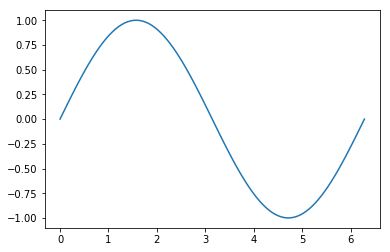

In [0]:
x=np.linspace(0,2*pi,100)
f=np.sin(x)
plt.plot(x,f)

In [0]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=bdf6c87b90a5db9660f78282515376cfc82ac68a0aed016522732cabfd099da0
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
import pandas as pd

In [0]:
boston=load_boston()

df_boston=pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target']=pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
df_boston.loc[:,'CRIM':'LSTAT'].shape

(506, 13)

In [0]:
X = df_boston.loc[:, 'CRIM':'LSTAT'] # 입력 데이터
y = boston.target
print("정규화,확장 전 데이터 셋 : ", X.shape, y.shape)
normalize_X = MinMaxScaler().fit_transform(X) # 입력 데이터 정규화
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(normalize_X) # 데이터 featur
print("정규화, 추가 생성 : ", ex_X.shape, y.shape)

정규화,확장 전 데이터 셋 :  (506, 13) (506,)
정규화, 추가 생성 :  (506, 104) (506,)


In [0]:
X_train,X_test,y_train,y_test=train_test_split(ex_X,
                                               df_boston.target,
                                              random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [0]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
## predict
pred=model.predict(X_test)
pred

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

In [0]:
diff=y_test-pred
mse=sum(diff**2)/len(diff)

In [0]:
mse

22.098694827098416

In [0]:
acc_tr  =model.score(X_train,y_train)
acc_test=model.score(X_test,y_test)

In [0]:
print('train데이터 정확도 : {:.2f}'.format(acc_tr))
print('test데이터 정확도 : {:.2f}'.format(acc_test))

train데이터 정확도 : 0.75
test데이터 정확도 : 0.68


In [0]:
df_diff=pd.DataFrame({'real':y_test,'prediction':pred,'difference':diff})
df_diff

,real,prediction,difference
173,23.6,28.838854,-5.238854
274,32.4,36.007833,-3.607833
491,13.6,15.083248,-1.483248
72,22.8,25.230909,-2.430909
452,16.1,18.878641,-2.778641
76,20.0,23.213983,-3.213983
316,17.8,17.593112,0.206888
140,14.0,14.305081,-0.305081
471,19.6,23.054390,-3.454390
500,16.8,20.620083,-3.820083


In [0]:
from sklearn.linear_model import Ridge

In [0]:
ridge=Ridge(alpha=1).fit(X_train,y_train)


In [0]:
ridge1=Ridge(alpha=0).fit(X_train,y_train)
ridge2=Ridge(alpha=0.1).fit(X_train,y_train)
ridge3=Ridge(alpha=1).fit(X_train,y_train)
ridge4=Ridge(alpha=10).fit(X_train,y_train)

In [0]:
for a in np.linspace(0,2,201):
  ridge=Ridge(alpha=a).fit(X_train,y_train)
  print('alpha:{}'.format(a))
  print('ridge score: {:.2f}'.format(ridge.score(X_train,y_train)))
  print('ridge score: {:.2f}'.format(ridge.score(X_test,y_test)))


alpha:0.0
ridge score: 0.94
ridge score: 0.78
alpha:0.01
ridge score: 0.94
ridge score: 0.81
alpha:0.02
ridge score: 0.93
ridge score: 0.82
alpha:0.03
ridge score: 0.93
ridge score: 0.82
alpha:0.04
ridge score: 0.93
ridge score: 0.82
alpha:0.05
ridge score: 0.92
ridge score: 0.82
alpha:0.06
ridge score: 0.92
ridge score: 0.82
alpha:0.07
ridge score: 0.92
ridge score: 0.82
alpha:0.08
ridge score: 0.92
ridge score: 0.82
alpha:0.09
ridge score: 0.92
ridge score: 0.82
alpha:0.1
ridge score: 0.92
ridge score: 0.82
alpha:0.11
ridge score: 0.92
ridge score: 0.83
alpha:0.12
ridge score: 0.92
ridge score: 0.83
alpha:0.13
ridge score: 0.91
ridge score: 0.83
alpha:0.14
ridge score: 0.91
ridge score: 0.83
alpha:0.15
ridge score: 0.91
ridge score: 0.83
alpha:0.16
ridge score: 0.91
ridge score: 0.83
alpha:0.17
ridge score: 0.91
ridge score: 0.83
alpha:0.18
ridge score: 0.91
ridge score: 0.83
alpha:0.19
ridge score: 0.91
ridge score: 0.83
alpha:0.2
ridge score: 0.91
ridge score: 0.83
alpha:0.21
ridge

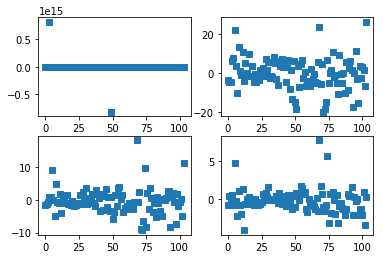

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.subplot(221)
plt.plot(ridge1.coef_,'s')
plt.subplot(222)
plt.plot(ridge2.coef_,'s')
plt.subplot(223)
plt.plot(ridge3.coef_,'s')
plt.subplot(224)
plt.plot(ridge4.coef_,'s')

In [0]:
from sklearn.linear_model import Lasso

In [0]:
lasso1=Lasso().fit(X_train,y_train)

In [0]:
?Lasso